In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [2]:
inputs = Input(shape=(1,), name="input_layer")
h1 = Dense(64, activation='relu', name="hidden_layer_1")(inputs)
h2 = Dense(128, activation='relu', name="hidden_layer_2")(h1)
h3 = Dense(64, activation='relu', name="hidden_layer_3")(h2)
outputs = Dense(1, name="output_layer")(h3)
model = Model(inputs=inputs, outputs=outputs, name="simple_model")
model.summary(show_trainable=True)

2025-08-27 10:24:05.758441: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "simple_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 1)             │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer_1 (Dense)      │ (None, 64)            │        128 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer_2 (Dense)      │ (None, 128)           │      8,320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ hidden_layer_3 (Dense)      │ (None, 64)            │      8,256 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ output_layer (Dense)        │ (None, 1)             │         65 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 16,769 (65.50 KB)

 Trainable params: 16,769 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
import numpy as np
def square(x):
    return ((x**2) + (3 * x) + 2)

# Data Process 
# n = 1000
# y = []
# x = np.random.randint(0, n , n)
# for i in range(n):
#     y.append(my_polynomial(x[i]))
# y = np.array(y)
# print(x)
# print(y)

# n = np.linspace(-5, 5, 100000)
# n = np.random.permutation(n)
# x = n.reshape(-1, 1)
# y = my_polynomial(n).reshape(-1, 1)


x = np.linspace(-2, 2 , 10000)
y = square(x)
print(len(x))
print(len(y))





10000
10000


In [5]:
# Prepare Trainning , Validation , Test Set
total_n = len(x)
train_n = int(total_n * 0.7)
val_n   = int(total_n * 0.1)
test_n  = int(total_n * 0.2)

trainX  = x[:train_n]
trainY  = y[:train_n]

valX    = x[train_n : train_n + val_n]
valY    = y[train_n : train_n + val_n]

testX   = x[train_n + val_n : train_n + val_n + test_n]
testY   = y[train_n + val_n : train_n + val_n + test_n]

In [6]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(trainX, trainY, validation_data= (valX, valY), epochs=500)


Epoch 1/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.4100 - mae: 0.2337 - val_loss: 0.0514 - val_mae: 0.2018
Epoch 2/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0027 - mae: 0.0312 - val_loss: 0.0434 - val_mae: 0.1833
Epoch 3/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.1550e-04 - mae: 0.0178 - val_loss: 0.0379 - val_mae: 0.1693
Epoch 4/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.1736e-04 - mae: 0.0114 - val_loss: 0.0337 - val_mae: 0.1577
Epoch 5/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.2430e-04 - mae: 0.0072 - val_loss: 0.0307 - val_mae: 0.1490
Epoch 6/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.4430e-05 - mae: 0.0051 - val_loss: 0.0290 - val_mae: 0.1440
Epoch 7/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.6357e-05 - mae: 0.0038 - val_loss: 0.0287 - val_mae: 0.1434
Epoch 8/500
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.2808e-05 - mae: 0.0040 - val_loss: 0.0264 - val_mae: 0.1360
Epoch 9/500
219/219 ━━━━

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


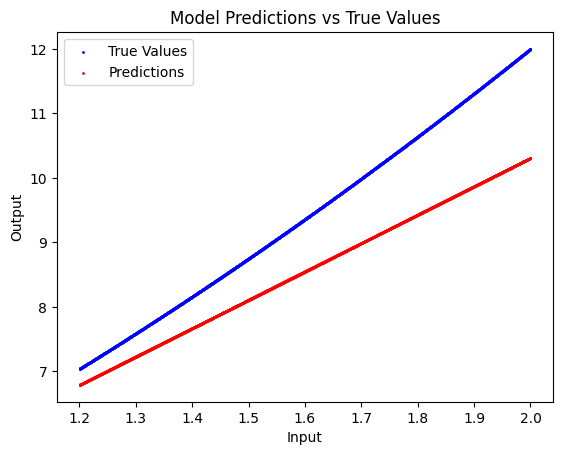

In [59]:
#testing the model
predictions = model.predict(testX)
import matplotlib.pyplot as plt
plt.scatter(testX, testY, label='True Values', color='blue', s=1)
plt.scatter(testX, predictions, label='Predictions', color='red', s=1)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Model Predictions vs True Values')
plt.legend()
plt.show()
# Save the model
model.save('PredictionModel.keras')

In [60]:
testV = 1000
Expected = square(testV)

# Make testV a 2D array with shape (1, 1)
predicted = model.predict(np.array([[testV]]))

print(f"Expected: {Expected}, Predicted: {predicted[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Expected: 1003002, Predicted: 4412.67236328125
